<head><b><center>CIENCIA DE DATOS</center>

<center>APRENDIZAJE SUPERVISADO</center>
<center>Profundizando en Redes Neuronales Artificiales: Clasificación y Regresión</center></b>
    

<center>Profesor: Gabriel Jara </center></head><br>
El presente Jupyter Notebook busca:
<ul>
    <li>Avanzar nuestro dominio sobre el uso de Redes Neuronales Artificiales.</li>
    <li>Explicar el mecanismo de aprendizaje de las redes neuronales.</li>
    <li>Explicar el rol de la función de pérdida y optimización.</li>
    <li>Aplicar modelos de ANN a problemas de regresión.</li>
</ul>

Nota: Las imágenes que han sido robadas de internet son enlaces a su correspondiente fuente. 



<b>EN EL CAPÍTULO ANTERIOR </b>

Presentamos las Redes Neuronales Artificiales como modelo de aprendizaje. Identificamos el <b><i>Perceptron</i></b> como unidad básica de este modelo, cuya función emula el rol de una neurona: percibe un estímulo según el cual se activa (o no) y con ello transmite una señal. 
<br> <img src=https://images.deepai.org/glossary-terms/perceptron-6168423.jpg
          width="400"/>

La naturaleza limitada de un perceptrón no permitiría que resolviera problemas muy complejos. En el contexto de Clasificación, sólo podría clasificar observaciones que fueran linealmente separables. Pero organizado en nodos de una red distribuida en capas densamente conectadas, alcanzan capacidades mucho mayores. Esta es la definición básica de una red neuronal, denominada <b><i>Multi-Layer Perceptron</i></b>. 
<br> <img src=https://miro.medium.com/v2/resize:fit:563/1*4_BDTvgB6WoYVXyxO8lDGA.png
          width="350"/>
          
Usamos redes neuronales de varias capas para clasificar a los pasajeros del Titanic, llegando a un accuracy de testeo por sobre 80%. Para llegar a este resultado sólo tuvimos que importar el constructor de redes densas de Keras, apilar las capas, configurar la cantidad de epochs de entrenamiento. Por ahora hemos explorado muy pocas configuraciones de red neuronal. 

La mayor dificultad que hemos encontrado, hasta acá, es que nuestros modelos son tan poderosos en capacidad de representación que fácilmente sobre-ajustan (overfitting), lo cual perjudica su capacidad de generalizar el aprendizaje. 

<img src=https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png width="400"/>

¿Qué más podríamos hacer con redes neuronales?        

<b>CLASIFICACIÓN DE IMAGENES</b>

Ya nos hemos aburrido del Titanic, al final siempre se hunde. Cuando se habla de Redes Neuronales Artificiales suele ser asociado a tareas mucho más interesantes, las que atribuimos al concepto de Inteligencia Artificial. Tratemos de adentrarnos un poco en ese mundo, para lo cual podemos tomar como referencia el problema de clasificar imágenes. 

Vamos a usar un dataset disponible en Keras, de forma que no necesitaremos datos propios. Se trata de <b><i>Mnist</i></b>, una colección de imágenes de dígitos (números) escritos a mano por distintas personas. 
<br> <img src=https://www.ttested.com/gallery/thumbnails/ditch-mnist.jpg
          width="400"/>


(2, 28, 28)
-  -  -  -  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -  -  -  -
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0   13   21    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0   12   77   77   77  180  222  185  185  131   77   49    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0   88  254  254  254  254  254  254  254  254  254  243  214   89    2    0    0    0    0    0    0  0  0  0  0
0  0

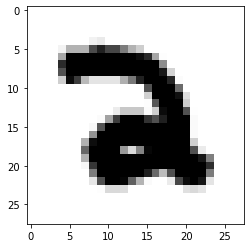

2


-  -  -  -  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -  -  -  -
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0   63  178  171  241  241  128   23    0    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0  147  253  254  253  253  253  233  109    0    0    0    0  0  0  0  0
0  0  0  0    0    0    0    0    0    0    0    0  101  173  254  253  253  253  253  245   68    0    0    0  0  0  0  0
0  0  0  0  

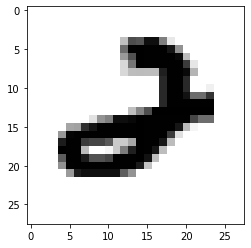

2


In [1]:
import numpy as np  
from keras.datasets import mnist
import random
import matplotlib.pyplot as plt
import tabulate

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X, y = zip(*random.sample(list(zip(X_train, y_train)), 2))

print(np.array(X).shape)

print(tabulate.tabulate(X[0]))
fig = plt.figure
plt.imshow(X[0], cmap='gray_r')
plt.show()
print(y[0])
print()
print()

print(tabulate.tabulate(X[1]))
fig = plt.figure
plt.imshow(X[1], cmap='gray_r')
plt.show()
print(y[1])


Podemos apreciar que Mnist almacena imágenes en blanco y negro (un único canal), de 28x28 pixeles. Hubo una época oscura, antes de que la IA iluminara nuestras vidas, en que reconocer texto escrito a mano era considerado un problema difícil de resolver para una computadora. Hoy se trata de un problema trivial, pero datasets como Mnist todavía se usan con fines educativos y también de investigación. Una de las formas de reportar que un modelo es más exitoso que otro es comparando sus resultados sobre sets de datos ya conocidos y disponibles para toda la comunidad. 

Usemos una ANN para clasificar Mnist. Como sólo es una demostración no vamos a usar todos los datos disponibles. Creemos un set de entrenamiento de 1000 imágenes, y dado que tenemos de sobra, saquemos otro set de 1000 imágenes para testeo. Así que partiremos por tomar 2000 imágenes para preprocesarlas y luego dividirlas en partes iguales para entrenamiento y testeo. 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
random.seed(123) # Vamos a controlar la aleatoriedad en adelante. 
X, y = zip(*random.sample(list(zip(X_train, y_train)), 2000))

Tenemos una colección de imágenes de 28x28 pixeles para entrenar... ¿como le metemos fotos a una red neuronal? 

Cada pixel de las imágenes es un número, así que al menos en eso no estamos mal. Según vimos nuestras ANN pueden recibir vectores, pero una imagen es una matriz, tiene dos dimensiones en lugar de sólo una. La solución es simple y directa, reacomodaremos cada imagen para que sea un vector de 784 números, en lugar de una matriz de 28x28. Puede imaginarlo como que recorta cada foto de arriba a abajo en 28 tiras, las pega a lo largo para formar una tira larga y le muestra eso a la Red Neuronal.  

In [3]:
print('Tamaño antes de rearreglar: ',len(X[0]),'x',len(X[0][0]))
X, y = np.array(X, dtype='float64'), np.array(y, dtype='float64')
X = np.reshape(X, (X.shape[0], -1))
print('Tamaño después de rearreglar: ',len(X[0]))

Tamaño antes de rearreglar:  28 x 28
Tamaño después de rearreglar:  784


Dijimos que aplicaremos normalización, así que vamos a usar Min-Max para estos efectos, aprovechando que ya está disponible en sklearn. 

In [4]:
from sklearn.preprocessing import MinMaxScaler
print('Antes: ',X[0])
print()
X= MinMaxScaler().fit_transform(X)
print('Después: ',X[0])

Antes:  [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 159. 239.  13.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.  95. 253. 188.   3.   0.   0.   0.   0.   0.   0.   0.   0

También necesitamos cambiar la forma de la variable dependiente $y$, que en este momento es un entero en el rango 0 a 9. La ANN va a tener 10 nodos de salida, por lo que sus resultados estarán en la forma de un vector de tamaño 10, de los que esperamos haya sólo un valor 1 y el resto sean 0, la posición donde esté el 1 marcará la clase predicha. Por lo tanto, necesitamos entrenar y testear con datos cuya etiqueta tenga esa forma. Esto es algo que ya hemos visto antes, lo podemos lograr transformando el dato a una representación categórica.  

In [5]:
from keras.utils import to_categorical

print('Antes: ',y[1])
y = to_categorical(y)
print('Después: ',y[1])

Antes:  6.0
Después:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Ya estamos en condiciones de dividir en dos la muestra, para entrenamiento y testeo. Hemos esperado a completar el preprocesamiento para facilitar la etapa de testeo. 

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

Probemos como le va a la ANN más simple que hicimos en la clase anterior, una capa con 8 nodos. ¿Será suficiente para aprender a leer los números?

In [7]:
from keras.models import Sequential
from keras.layers import Dense
import time


# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Creamos un modelo de la red neuronal declarando una secuencia a la que agregaremos capas. 
model = Sequential()

# Necesitamos identificar cuantos nodos tiene nuestra entrada, y eso depende de la cantidad de Xs.
entrada_dim = len(X_train[0])

# Agregamos la primera capa oculta, donde además declaramos la dimensión de la capa de entrada.
# Debemos establecer cuantos nodos tiene esta capa oculta.
# Debemos declarar la función de activación de estos nodos. 
model.add(Dense(units=8, activation='relu', input_dim=entrada_dim))

# Agregamos una capa de salida con 10 nodos ÚNICO CAMBIO RESPECTO A LA RED QUE USAMOS CON TITANIC
# Declaramos la función de activación del nodo de salida. 
model.add(Dense(units=10, activation='sigmoid'))

# Compilamos el modelo indicando la función de perdida, optimizador y métricas.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Registremos cuanto se demora. 
inicio = time.time()

# Entrenamos el modelo con los datos de entrenamiento
# Haremos 10 iteraciones de entrenamiento
# en cada una de ellas los datos de entrenamiento se usarán de uno en uno.
model.fit(X_train, y_train, epochs=10, batch_size=1)

fin = time.time() 
duración = fin - inicio

# Evaluamos el modelo con datos de testeo
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
print('Se demoró {:.2f} minutos.'.format(duración/60))


Epoch 1/10
1000/1000 [==============================] - 2s 1ms/step - loss: 0.3578 - accuracy: 0.2830
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1970 - accuracy: 0.6470
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1415 - accuracy: 0.7840
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.1177 - accuracy: 0.8250
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1025 - accuracy: 0.8550
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0912 - accuracy: 0.8730
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0824 - accuracy: 0.8920
Epoch 8/10
1000/1000 [==============================] - 1s 924us/step - loss: 0.0756 - accuracy: 0.9040
Epoch 9/10
1000/1000 [==============================] - 1s 963us/step - loss: 0.0696 - accuracy: 0.9160
Epoch 10/10
32/32 [==============================] - 0s 929us/step - loss: 0.1

Podemos observar que se logra del orden de 70% ~ 80% de accuracy de testeo. Puede que no suene tan impresionante, pero tomemos en cuenta una diferencia importante respecto al Titanic, ¿cuál sería la exactitud de un modelo tonto? Ya fuera que asignáramos la etiqueta al azar o que usemos la moda para etiquetarlas a todas, en el mejor de los casos apenas superaríamos 10% de accuracy. Cualquier clasificador que logra significativamente más de 10% en este problema debe estar aprendiendo. 

Lo que sigue es definir un modelo de ANN más poderoso y entrenarlo en cantidad suficiente para que logre aprender a clasificar, pero antes de que el overfitting degrade su capacidad de generalización. Podríamos usar un grid search y cross validation, pero por tiempo de ejecución, para esta experiencia vamos a usar una cantidad fija de 60 epochs.   

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos 60 épocas
model.fit(X_train, y_train, epochs=60,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)

# Las clases en los datos de testeo y entrenamiento, en 
# este momento, son vectores. Para poder evaluar nos conviene 
# más que vuelva a ser un campo numérico.
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]

# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[ 90   0   1   0   1   3   5   0   0   1]
 [  0 102   4   1   0   1   0   0   1   0]
 [  1   1  90   2   5   0   5   0   5   0]
 [  1   5   4  81   0   2   0   1   5   1]
 [  0   0   2   0  84   1   2   0   1   5]
 [  1   0   1   3   0  77   3   0   3   1]
 [  1   1   0   0   2   2 106   0   0   0]
 [  0   4   1   0   1   0   0  88   0   6]
 [  3   0   3  10   1   6   2   0  68   0]
 [  1   0   0   1   3   3   0   2   1  81]] 

La exactitud de testeo del modelo ANN es: 0.867


<b>HIPERPARÁMETROS DE OPTIMIZACIÓN</b>

Revisemos a continuación qué otros hiperparámetros tenemos disponibles para buscar una mejor configuración de la red neuronal. 

<b>Función de costo / Perdida / Error</b>

Corresponde a la métrica con la que se evalúa el error de la predicción durante el entrenamiento. Esto significa que será dicha función la que se busca minimizar, y por tanto condiciona hacia donde buscará moverse la red neuronal. En problemas de clasificación las métricas a utilizar como perdida necesitan hacer referencia a la información que la predicción consigue capturar respecto a las observaciones reales, por eso lo más típico es usar medidas de entropía de información. 

<ul><li><b>Entropía Cruzada Binaria(Binary Crossentropy)</b> es la que ya estamos usando, Se utiliza en problemas de clasificación binaria donde hay dos clases. Nosotros lo estamos usando en un problema multiclase, pero atención que en cada nodo de salida nuestra red evalúa problemas de clasificación binarios, por lo que funciona.</li>
    <li><b>Entropía Cruzada Categórica (Categorical Crossentropy)</b> Se utiliza en problemas de clasificación multiclase donde las clases se representan mediante codificación one-hot. Es apropiada cuando las clases son mutuamente excluyentes y el objetivo es asignar una única clase a cada muestra. Debieramos probarlo en el problema de Mnist.</li>
    <li><b>Entropía Cruzada Categórica Dispersa (Sparse Categorical Crossentropy)</b> Similar a la entropía cruzada categórica, pero se utiliza cuando las clases se representan mediante etiquetas enteras en lugar de codificación one-hot. Es útil cuando hay un gran número de clases y la representación one-hot es ineficiente.</li></ul>

No vamos a adentrarnos más en el cálculo de estas métricas cuyo origen está en teoría de la información y nos tomaría tiempo lograr una comprensión básica de ellas. La clase pasada ya exploramos el concepto de Entropía de Shanon. 

Probemos a continuación nuestra red neuronal usando Categorical Crossentropy. 

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN 
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='sigmoid'))
# ACÁ CAMBIAMOS LA FUNCIÓN DE PERDIDA
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Le pasamos la mejor epoch
model.fit(X_train, y_train, epochs=60,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)


# El set de datos de testeo y el entrenamiento, en este momento, son vectores.
# Para poder evaluar nos conviene más que vuelva a ser un campo numérico
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]


# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[ 93   0   2   0   0   1   4   0   0   1]
 [  0 104   2   1   0   0   0   0   2   0]
 [  1   1  88   2   4   0   6   3   4   0]
 [  0   1   1  88   0   1   1   2   4   2]
 [  0   0   2   0  84   2   0   1   0   6]
 [  2   0   0   2   0  78   1   0   6   0]
 [  1   1   2   0   7   6  94   0   1   0]
 [  0   4   0   0   1   1   0  84   1   9]
 [  3   2   0   7   2   5   2   1  71   0]
 [  0   1   0   1   5   2   0   5   2  76]] 

La exactitud de testeo del modelo ANN es: 0.860


<b>Función de Activación</b>

En las ANN se ha usado distintas funciones de activación. Una de las más clásicas es <b>Sigmoid</b>, que es un caso de la que ya conocemos como función logística.

$$Sig(x) = \frac{1}{1 + e^{-x}}$$

<br> <img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png
          width="300"/>

Su gracia es que da resultados que tienden a 0 o 1, con un $x=0$ como umbral crítico. Esto es lo que la hace útil como función de activación de nodos de salida en un problema de clasificación.

<b>Tanh (Tangente hiperbólica)</b> es similar a Sigmoidal pero con rango -1 y 1. El efecto es parecido al que produce la función sigmoidal, pero mapea explícitamente valores negativos. 

<br> <img src=https://miro.medium.com/v2/resize:fit:750/format:webp/1*f9erByySVjTjohfFdNkJYQ.jpeg
          width="300"/>

Otra función de activación útil en los nodos de salida en problemas de clasificación es <b>Softmax</b>, la cual devuelve una probabilidad entre 0 y 1. Permite interpretar el resultado como un mapa de probabilidades sobre todas las clases, en lugar de una salida categórica. Esto puede ser útil en clasificación de muchas etiquetas, sobre todo cuando hay alta incerteza en la clasificación. 

¿Cuál de estas funciones es mejor? dependerá del problema, así que muchas veces querremos probar alternativas en nuestras capas de salida. 

Todas las anteriores sirven en capas de salida ante problemas de clasificación. Las que mencionaremos a continuación no se usan en capas de salida en problemas de clasificación porque se comportan como variables continuas y por tanto no pueden representar bien variables categóricas. 
    
Para las capas ocultas ya hemos usado <b>Relu (Rectified Linear Unit)</b>. Básicamente es una función lineal pero que sólo se activa para valores positivos. 
<br> <img src=https://miro.medium.com/v2/resize:fit:828/format:webp/1*XxxiA0jJvPrHEJHD4z893g.png
          width="500"/>
Esto permite simular el comportamiento de una neurona que, ante cierto umbral se activa, pero que además puede transmitir en toda su intensidad la señal que recibe, en lugar de quedar limitada a un resultado binario. Así, la cantidad de información que puede comunicar es mucho mayor.
    
De hecho también es legítimo usar una activación <b>Lineal</b>, que puede ser simplemente la identidad. 
<br> <img src=https://miro.medium.com/v2/resize:fit:828/format:webp/1*tldIgyDQWqm-sMwP7m3Bww.png
          width="300"/>

Se puede probar muchas otras funciones de activación, por ejemplo una función <b>Exponencial</b> tendrá el efecto de activarse lento hasta un punto de saturación en el que la intensidad de salida se dispara. Muchas de las funciones de nuestro organismo presentan ese comportamiento, por ejemplo en nuestra percepción de temperatura. 
<br> <img src=https://www.researchgate.net/profile/Alexander-Bismark/publication/339240163/figure/fig83/AS:880668561117185@1586979155257/Figure-B6-Plot-of-the-Exponential-activation-function-For-a-definition-of-its.ppm
          width="350"/>
   
Casi siempre vamos a usar más de una función de activación en nuestras ANN, sobre todo para discriminar capas ocultas respecto a las de salida. Como siempre, no debemos suponer que se puede elegir con certeza la mejor combinación de funciones de activación. Parte importante de lo que se denomina <i>Aprendizaje Profundo</i> se logra acumulando muchas capas con distintas topologías y funciones de activación. 
    
Sin embargo, siendo tanta la cantidad de alternativas (acá sólo se ha mencionado algunas), tampoco podemos buscar exhaustivamente por todas ellas. La recomendación es identificar casos donde problemas similares se hayan resuelto con redes neuronales y qué configuraciones fueron más exitosas, para intentar buscar desde allí. 

Probemos a continuación nuestra red con distintas funciones de activación en su capa de salida. 

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# ACÁ CAMBIAMOS LA FUNCIÓN DE ACTIVACIÓN DE LA CAPA DE SALIDA
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Le pasamos la mejor epoch
model.fit(X_train, y_train, epochs=60,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)


# El set de datos de testeo y el entrenamiento, en este momento, son vectores.
# Para poder evaluar nos conviene más que vuelva a ser un campo numérico
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]


# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[ 90   0   1   0   1   3   5   0   0   1]
 [  0 102   4   1   0   1   0   0   1   0]
 [  1   1  90   2   5   0   5   0   5   0]
 [  1   5   4  81   0   2   0   1   5   1]
 [  0   0   2   0  84   1   2   0   1   5]
 [  1   0   1   3   0  77   3   0   3   1]
 [  1   1   0   0   2   2 106   0   0   0]
 [  0   4   1   0   1   0   0  88   0   6]
 [  3   0   3  10   1   6   2   0  68   0]
 [  1   0   0   1   3   3   0   2   1  81]] 

La exactitud de testeo del modelo ANN es: 0.867


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
# ACÁ PROBAMOS OTRA MÁS. 
model.add(Dense(units=10, activation='tanh'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Le pasamos la mejor epoch
model.fit(X_train, y_train, epochs=60,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)


# El set de datos de testeo y el entrenamiento, en este momento, son vectores.
# Para poder evaluar nos conviene más que vuelva a ser un campo numérico
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]


# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[ 90   0   0   0   0   2   7   0   2   0]
 [  0 106   1   0   0   1   0   0   1   0]
 [  1   2  90   1   5   0   5   0   5   0]
 [  0   1   2  88   0   4   0   2   2   1]
 [  0   0   1   0  76   1   1   0   4  12]
 [  2   0   3   2   1  77   0   1   3   0]
 [  1   0   0   0   3   4 101   0   3   0]
 [  0   4   0   0   2   0   0  85   0   9]
 [  1   3   0   1   0   2   3   0  81   2]
 [  0   1   0   1   0   2   0   3   2  83]] 

La exactitud de testeo del modelo ANN es: 0.877


Observamos de los experimentos previos que Tanh dio resultados levemente mejores que Sigmoid y Softmax, en la capa de salida. 

<b>¿CÓMO APRENDE LA RED NEURONAL?</b>

Cada nodo se activa según su función de activación y la señal que recibe. Que la señal sea mayor o menor que cero, por ejemplo, dependerá sobre todo de los pesos $w$ que estén configurados. Estos pesos $w$ son parámetros internos de la red.

<b>NOTA: ¿Cuál es la diferencia entre parámetros e hiperparámetros?</b>  Todos los modelos se basan en variables internas que según el valor que adopten dan un resultado u otro, todas estas variables son parámetros del modelo. Aquellos parámetros que deben ser configurados manualmente por el investigador son denominados hiperparámetros, mientras que los valores que se ajustan automáticamente durante el entrenamiento no son hiperparámetros pero sí califican como parámetros. 

Los pesos $w$ son parámetros de la red neuronal, no los selecciona el investigador, se ajustan durante el entrenamiento. ¿Pero cómo se llega a establecer este ajuste? En un principio se asignan valores aleatorios, pero a continuación se entrena la red mostrándole un vector $x$ que representa los atributos de una observación que ingresa como entrada, y se computa una función de costo, error o perdida (tiene varios nombres) con el resultado a la salida, al compararlo con la clase real. ¿Cómo ocurre este proceso?

<b><i>Forward Propagation</i></b>

Sabemos que nuestra ANN es una secuencia de capas. Hemos visto que la entrada de una capa es la salida de la capa anterior. Así, una señal que ingresa por la capa de entrada, es transformada sucesivamente, capa por capa, hasta salir por la capa de salida. Este mecanismo se llama <b><i>Forward Propagation</i></b> (propagación hacia adelante). 
<br> <img src=https://miro.medium.com/v2/resize:fit:828/format:webp/1*ddDKxWSAYci2dHaG3O_DOg.png
          width="400"/></br>

¿Qué transformación se produce capa por capa? Por cada nodo ocurre una transformación lineal de sus datos de entrada, que depende del valor que tienen los pesos $w$ de la misma forma que ocurría con los parámetros $\beta$ en la regresión lineal. A continuación se aplica una función de paso (función de activación).
<br> <img src=https://images.deepai.org/glossary-terms/perceptron-6168423.jpg
          width="400"/>

¿Cómo se establece la magnitud de cada peso $w$? eso es justamente lo que ocurre durante el entrenamiento, los pesos $w$ se ajustan hasta que logran generar buenas predicciones. 

<b><i>Gradient Descent</i></b>

Lo primero que necesitamos es definir una función de costo asociada al error observado entre predicción y realidad. El entrenamiento de la ANN es un proceso de optimización que consiste en minimizar dicho costo ajustando los pesos $w$. Esto implica que entendemos que el costo es una función de los pesos $w$, por lo que podemos usar técnicas de optimización para encontrar un costo mínimo. El método del gradiente descendente, <b><i>Gradient Descent</i></b>, se basa en medir la dirección y magnitud de la pendiente de la curva de costo respecto a los pesos $w$, para lo cual usa las derivadas parciales entre costo y los $w$. A dicho vector de derivadas parciales se le llama <i>gradiente</i>, lo podemos imaginar como la dirección de caída de la superficie que forma la función de costo.  

$$w = w - \alpha \frac{{\partial error}}{{\partial w}}$$

<br> <img src=https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png
          width="400"/>
          
En la ecuación interviene también un hiperparámetro $\alpha$ denominado tasa de aprendizaje (learning rate), valor que controla la magnitud de la actualización. Necesitamos que en cada iteración los pesos se actualicen en la dirección del mínimo de la función de costo, también necesitamos que ese avance converja al óptimo dentro del tiempo de entrenamiento, pero además debemos cuidar no ir tan rápido que en una iteración nos pasemos del mínimo al punto de quedar peor. En este último escenario lo que ocurriría es que la optimización no convergería a un óptimo, si no que sería divergente. La learning rate permite controlar la magnitud de cada salto, permitiendo buscar una mejor convergencia. 
<br> <img src=https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png
          width="700"/>

<b><i>Backward Propagation</i></b>

El problema es que no tenemos una forma de calcular directamente las derivadas parciales de la función de costo respecto a los pesos $w$. Pero, la función de costo es una función que representa el error del modelo, y por tanto depende de las etiquetas reales y predichas, es decir de $y$ e $\hat{y}$. La función de costos la definimos nosotros, es la forma en la que decidamos calcular el error del modelo predictivo. Por lo tanto, al menos sí conocemos la derivada de la función de costo respecto a $\hat{y}$.

Por ejemplo, ya hemos usado el Error Cuadrático Medio cuando vimos Regresión Lineal, y en ese caso cada observación genera un error cuadrático de la forma:

$$loss = error = (y - \hat{y})^2$$

Por lo que la derivada parcial tendrá la forma:

$$\frac{\partial error}{\partial \hat{y}} = 2 (\hat{y} - y)$$

Desde esta derivada parcial podemos llegar a las que corresponden al error (función de costo) respecto de los $w$ de cada capa, gracias al uso de la regla de la cadena en el método que se denomina <b><i>Backward Propagation</i></b>. 

La salida $\hat{y}$ es función de los pesos de la última capa, por lo que podemos calcular la derivada de la salida $\hat{y}$ respecto a los pesos $w$. Usando la regla de la cadena obtenemos la derivada de la función de costo respecto a los pesos $w$. 

$$ \frac{\partial error}{\partial w} = \frac{\partial error}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w}$$

Así que, lo que hemos logrado con lo anterior es relacionar el gradiente del costo respecto a los pesos $w$ de la última capa con el gradiente de la predicción $\hat{y}$ respecto a dichos pesos. Así que necesitamos la gradiente de la entrada de la capa anterior, que a su vez es la salida de la capa anterior a la anterior... O sea, se repite todo el análisis pero una capa más atrás. 

La propagación en reversa se repite de capa en capa, desde la última a la primera capa de la red. En dicha primera capa la entrada no es otra cosa que $x$, es decir el vector de entrada que representa cada observación del set de datos. De acá el nombre del método <b><i>backward propagation</i></b>, propagación hacia atrás, puesto que la magnitud del ajuste de pesos se computa desde la salida de la ANN hacia la entrada. 
<br> <img src=https://miro.medium.com/v2/resize:fit:828/format:webp/1*0QPRST83oBicKPE_R4biJA.png
          width="600"/>
   

<br> <img src=https://ih1.redbubble.net/image.5142581850.1941/bg,f8f8f8-flat,750x,075,f-pad,750x1000,f8f8f8.jpg
          width="200"/>
¿Hasta dónde es importante entender el proceso de aprendizaje de la ANN?

Las ciencias de la computación, así como las ciencias de datos, aprovechan los recursos que se generan a partir de descubrimientos como el descrito. La buena noticia es que los ingenieros trabajamos con los artefactos que se han construido de ellos, no con el marco teórico fundamental. Sin embargo, ello no significa que no requiramos una comprensión general de los procesos involucrados en el funcionamiento de las herramientas de las que dependemos. 

Queda pendiente para asignatura electiva hacer mayor demostración del gradiente descedente, así como programar una red neuronal <i>from the scratch</i>. 


En los experimentos previos usamos como Optimizador <b>Adam (Adaptive Moment Estimation)</b>, el cual es un algoritmo nuevo (2015), pero que se basa en buena parte en el clásico Gradiente Descendente (que viene del siglo XIX). Todavía podemos usar el algoritmo clásico, pero las versiones modernas son más eficiente y rápidas para llegar al óptimo. Adam en particular es considerado el más popular en entrenamiento de ANNs profundas, de modo que no tenemos grandes motivaciones para cambiarlo. 

<b>Hiperparámetros de ADAM</b>

Ya hemos hablado del <b>Learning rate</b> que multiplica al gradiente y controla la velocidad del aprendizaje. Su valor predeterminado es es 0.001, se puede aumentar para acelerar el aprendizaje, aunque si se nos pasa la mano terminaremos con una red que diverge en lugar de converger a un óptimo. 

Adam agrega el hiperparámetro <b>decay</b>, que especifica la tasa de decaimiento para el learning rate en cada actualización de los pesos $w$. Si se establece un valor distinto de cero, el learning rate disminuye gradualmente a medida que avanza el entrenamiento. Esto puede ayudar a estabilizar el proceso de optimización y evitar fluctuaciones bruscas en los pesos. 

Adam considera otros hiperparámetros, dos de ellos que suele ser útil explorar son <b>beta_1</b> y <b>beta_2</b>. Ambos son coeficientes de decaimiento para los momentos de primer y segundo orden en el optimizador Adam. Controlan la contribución relativa de los momentos pasados en el cálculo de los momentos actuales. Los valores predeterminados son 0.9 y 0.999 respectivamente.

Estos y otros hiperparámetros del optimizador permiten controlar la velocidad y capacidad para converger del algoritmo que encuentra el óptimo. También facilitan al algoritmo evitar caer en óptimos locales 

<br> <img src="https://www.allaboutlean.com/wp-content/uploads/2018/08/Local-Global-Optimum.png"
          width="400"/>
          
A continuación probaremos algunos hiperparámetros del optimizador. 

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow import keras

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='tanh'))

# DECLARAMOS EL OPTIMIZADOR PARA CONFIGURAR SUS HIPERPARAMETROS
# Ello va a incluir un programa de decaimiento del Learning Rate. 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Y LO PASAMOS AL COMPILADOR
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# DADO QUE ESTAMOS USANDO DECAY, AUMENTAREMOS LOS EPOCH PARA COMPENSAR
model.fit(X_train, y_train, epochs=120,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)


# El set de datos de testeo y el entrenamiento, en este momento, son vectores.
# Para poder evaluar nos conviene más que vuelva a ser un campo numérico
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]


# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[100   0   0   0   0   0   1   0   0   0]
 [  0 101   1   2   0   0   1   1   3   0]
 [  1   2  91   2   4   0   2   1   6   0]
 [  1   5   2  86   0   0   1   1   4   0]
 [  1   0   1   2  85   0   3   0   3   0]
 [ 17   5   1  35   7   0   7   0  17   0]
 [  3   0   2   0   2   0 102   0   3   0]
 [  0   2   0   1   5   0   0  89   3   0]
 [  1   2   2   5   1   0   3   0  79   0]
 [  2   1   0   2  39   0   0  30  18   0]] 

La exactitud de testeo del modelo ANN es: 0.733


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras import optimizers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=10, activation='tanh'))

# DECLARAMOS EL OPTIMIZADOR PARA CONFIGURAR SUS HIPERPARAMETROS
# Buscamos una mejora configuracion de hiperparámetros del optimizador. 
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.5)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)

# Y LO PASAMOS AL COMPILADOR
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# DADO QUE ESTAMOS USANDO DECAY, AUMENTAREMOS LOS EPOCH PARA COMPENSAR
model.fit(X_train, y_train, epochs=120,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)


# El set de datos de testeo y el entrenamiento, en este momento, son vectores.
# Para poder evaluar nos conviene más que vuelva a ser un campo numérico
y_test = [list(a) for a in y_test]
y_hat = [list(a) for a in y_hat]
y_test = [ a.index(max(a)) for a in y_test]
y_hat = [ a.index(max(a)) for a in y_hat]


# Reportamos los resultados del modelo
matriz_conf = confusion_matrix(y_test, y_hat)

print('MATRIZ DE CONFUSIÓN para modelo ANN')
print(matriz_conf,'\n')
print('La exactitud de testeo del modelo ANN es: {:.3f}'.format(accuracy_score(y_test,y_hat)))

32/32 [==============================] - 0s 1ms/step
MATRIZ DE CONFUSIÓN para modelo ANN
[[ 94   0   1   0   0   2   3   0   1   0]
 [  0 104   1   0   0   1   1   0   2   0]
 [  2   1  91   2   6   0   0   2   5   0]
 [  1   1   3  83   0   2   2   1   7   0]
 [  0   1   1   0  83   2   1   0   1   6]
 [  2   1   0   2   1  80   0   0   2   1]
 [  0   1   0   0   1   5 105   0   0   0]
 [  0   2   0   1   2   0   0  88   0   7]
 [  1   3   2   2   1   7   2   0  74   1]
 [  1   1   0   0   2   2   0   1   3  82]] 

La exactitud de testeo del modelo ANN es: 0.884


Algo hemos mejorado los resultados ajustando hiperparámetros del optimizador, pero debiéramos organizar una búsqueda exhaustiva de la configuración idónea, usando muestra de validación o validación cruzada, si tuviéramos más tiempo para ello. 

<b>REDES NEURONALES PARA REGRESIÓN</b>

Si queremos que nuestra red neuronal no clasifique entre categorías, y en cambio devuelva estimación de una variable numérica, basta con reducir la capa de salida a un único nodo y poner allí una activación lineal (Relu serviría para valores que son siempre positivos). Además, tendremos que cambiar la función de pérdida para medir el error de una regresión en lugar de clasificación, por lo general usaríamos el error cuadrático medio. 

Probemos esta idea con el problema de la Planta de Ciclo Combinado. Ya habíamos usado este set de datos para ilustrar Regresión Lineal, pero en ese entonces no teníamos el cuidado de comprobar nuestros resultados con una muestra de testeo. Repitamos el experimento de la regresión lineal y veamos que tan bien generaliza. 

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importar datos desde csv
file = open("Ciclo_Combinado.csv", "r")
obs = file.read()
file.close()
obs = obs.split("\n")
# hay un salto de línea demás en el archivo
obs.remove(obs[-1])
# dividir los datos por coma. 
for j in range(len(obs)):
    obs[j] = obs[j].split(",")
# transformar a numpy array.
obs = np.array(obs)
# Valores Y (variable dependiente)
y = obs[:,-1][1:]
# Matriz X (variables independientes)
X = obs[:,:-1][1:]

# Los valores de X e y tienen que ser numéricos
X, y = np.array(X, dtype='float64'), np.array(y, dtype='float64')

# Usamos Min-Max para estandarizar el rango de datos 
X= MinMaxScaler().fit_transform(X)

# Usaremos 80% para entrenar y 20% para testear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [20]:
from sklearn.linear_model import LinearRegression

#Se define el modelo
model = LinearRegression().fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print('Coeficiente de determinación (R2):', r_sq)
print('Intercepto (Beta0):', model.intercept_)
print('Pendiente (Betas 1 en adelante):', model.coef_)

Coeficiente de determinación (R2): 0.9270312819720488
Intercepto (Beta0): 502.6779548850371
Pendiente (Betas 1 en adelante): [-69.67963929 -13.19868804   2.52774185 -11.85391564]


<b>Métricas para evaluar Regresión</b>

El <b>Error Cuadrático Medio</b> es una de las métricas más relevantes en los problemas de Regresión, el método de optimización de Regresión Lineal se basa en la minimización de esta métrica. Ya hemos mencionado que podemos usarlo como función de perdida en una red neuronal. Por lo tanto, podemos evaluar los resultados de la regresión usando el error cuadrático medio (MSE). 

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

MSE nos da el error medio al cuadrado, por lo que sacar su raíz nos permite tener una idea más clara del error medio que produce el modelo, en la misma escala que la variable $y$. 

El score con que se evalúa por defecto en Regresión Lineal es el <b>coeficiente de determinación $R^{2}$</b>. Este mide cuanto de la variabilidad de los datos reales logra ser explicada por el modelo, devolviendo un rango de 0 a 1 donde 1 correspondería a una determinación perfecta entre modelo y observaciones, 0 corresponde a que el modelo no dice nada respecto a las observaciones (o al menos que dice menos de lo que ya dice la media). Se obtiene de la división del error cuadrático con la desviación respecto a la media al cuadrado. 

$$R^2 = 1 - \frac{{\sum_i (y_i - \hat{y}_i)^2}}{{\sum_i (y_i - \bar{y})^2}}$$

Podría darse el caso de un coeficiente de determinación $R^{2}$ negativo, pero sería la situación donde el modelo no sólo no explica las observaciones, sino que es consistentemente peor que asumir el valor promedio como predicción. Esta es una situación anómala, por lo que el rango de $R^{2}$ se considera entre 0 y 1. 

Respecto al problema de la planta de ciclo combinado, con Regresión Lineal, al entrenar el modelo ya obtuvimos el coeficiente de determinación $R^{2}$ sobre los datos de entrenamiento. Evaluemos el MSE  y el coeficiente de determinación sobre la muestra de testeo y comparemos respecto a la predicción de entrenamiento. 


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Resultado sobre el entrenamiento
y_hat = model.predict(X_train)
mse = mean_squared_error(y_train, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_hat)
print("Error Cuadrático Medio de entrenamiento:", mse)
print("Raíz del Error Cuadrático Medio de entrenamiento:", rmse)
print("Coeficiente de Determinación R2 de entrenamiento:", r2)
print()
# y con sombrero son los resultados de la predicción
y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
print("Error Cuadrático Medio de testeo:", mse)
print("Raíz del Error Cuadrático Medio de testeo:", rmse)
print("Coeficiente de Determinación R2 de testeo:", r2)

Error Cuadrático Medio de entrenamiento: 20.59326659435902
Raíz del Error Cuadrático Medio de entrenamiento: 4.537980453280844
Coeficiente de Determinación R2 de entrenamiento: 0.9291053443563475

Error Cuadrático Medio de testeo: 21.468390968412617
Raíz del Error Cuadrático Medio de testeo: 4.633399504512061
Coeficiente de Determinación R2 de testeo: 0.9270312819720488


Vemos que con Regresión Lineal se da el patrón habitual en que los resultados de testeo se ven peor que los de entrenamiento, pero la diferencia es bastante poca. Regresión Lineal no es un modelo que pueda sobre ajustar mucho, dada la naturaleza lineal del mismo. 

¿Podemos lograr un mejor modelo predictivo de la potencia que genera la planta usando una Red Neuronal? Veamos. 

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# Seed 
seed_value= 1234
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

# Definimos el modelo de tipo ANN
model = Sequential()
entrada_dim = len(X_train[0])
model.add(Dense(units=32, activation='relu', input_dim=entrada_dim))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# ACÁ CAMBIAMOS LA FORMA DE LA SALIA A UN NODO CON ACTIVACIÓN LINEAL
model.add(Dense(units=1, activation='linear'))

# ACÁ CAMBIAMOS LA FUNCIÓN DE PERDIDA POR MSE. 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

# Entrenamos 60 épocas
model.fit(X_train, y_train, epochs=60,
          batch_size=32,
          verbose = 0)

# Usamos el modelo para predecir sobre el conjunto de prueba
y_hat = model.predict(X_test)

# la predicción es una lista de vectores con un elemento, necesitamos que sean números
y_hat = [a[0] for a in y_hat]



60/60 [==============================] - 0s 1ms/step


In [23]:
import pandas as pd
import random

# imprimieromos sólo una muestra de casos al azar. 
samp = random.sample(range(len(y_test)),10)

# Crear un diccionario con los resultados reales y predichos para la muestra
data = {
    'Resultado Real': [y[i] for i in samp],
    'Resultado Predicho': [y_hat[i] for i in samp]
}

# Convertir el diccionario a un DataFrame de pandas para mostrar en tabla
df_results = pd.DataFrame(data)

# Mostrar la tabla
print(df_results)

   Resultado Real  Resultado Predicho
0          442.70          430.892975
1          445.95          476.838898
2          432.09          448.179321
3          427.05          450.435394
4          438.28          440.231812
5          458.19          446.907837
6          435.94          428.565125
7          442.49          429.447144
8          479.48          469.028168
9          467.22          477.866486


In [24]:
from sklearn.metrics import mean_squared_error, r2_score

# Resultado sobre el entrenamiento
y_hat = model.predict(X_train)
mse = mean_squared_error(y_train, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_hat)
print("Error Cuadrático Medio de entrenamiento:", mse)
print("Raíz del Error Cuadrático Medio de entrenamiento:", rmse)
print("Coeficiente de Determinación R2 de entrenamiento:", r2)
print()
# y con sombrero son los resultados de la predicción
y_hat = model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)
print("Error Cuadrático Medio de testeo:", mse)
print("Raíz del Error Cuadrático Medio de testeo:", rmse)
print("Coeficiente de Determinación R2 de testeo:", r2)

240/240 [==============================] - 0s 899us/step
Error Cuadrático Medio de entrenamiento: 19.35311515881083
Raíz del Error Cuadrático Medio de entrenamiento: 4.399217562113839
Coeficiente de Determinación R2 de entrenamiento: 0.933374706313389

60/60 [==============================] - 0s 985us/step
Error Cuadrático Medio de testeo: 20.328536292488383
Raíz del Error Cuadrático Medio de testeo: 4.508717810252532
Coeficiente de Determinación R2 de testeo: 0.9309055236216783


Obtenemos una mejor predicción con la ANN que la que nos daba Regresión Lineal. Puede que parezca una pequeña diferencia, pero ese 0.12 de error que en promedio estamos reduciendo en cada predicción (que bajó de 4.63 a 4.51 al cambiar de Regresión Lineal a Red Neuronal), podría tener un impacto económico importante. Además, no hemos realizado aún ningún esfuerzo por optimizar la Red Neuronal, así que bien podríamos esperar que mejore si incrementamos la topología, buscamos el entrenamiento adecuado, probamos otras funciones de activación y/o probamos cambiar la función de costo.  

<b> CONCLUSIÓN </b>

Hemos profundizado en la implementación de modelos de clasificación y regresión usando Redes Neuronales Artificiales. Se ha buscado aportar a la comprensión del funcionamiento del algoritmo de optimización clásico, Gradiente Descendente, aunque queda mucho tema por desarrollar allí y este es un curso más práctico que teórico. Se ha ilustrado las similitudes y diferencias que ocurren al abordar problemas de clasificación y regresión con redes neuronales.

Hemos podido constatar que las redes neuronales artificiales, sin grandes adaptaciones, sirven en problemas de clasificación como de regresión. Ello da cuenta de la universalidad que caracteriza este tipo de modelo de aprendizaje, lo cual junto a sus muchas otras virtudes le han valido transformarse en un importante pilar de la Ciencia de Datos. 

El apunte aborda los temas teóricos que deben ser estudiados en la asignatura, a la vez que provee de material práctico en la forma de código en Python y uso de librerías y recursos. No reemplaza la búsqueda y curiosidad de quién está aprendiendo, pero es una guía sobre la cual se basará las futuras evaluaciones. 